In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv


In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

## ACF

# Autocorrelation Function (ACF)

The **Autocorrelation Function (ACF)** measures the correlation between a time series and its own lagged values. This helps identify patterns or dependencies in the data across different time lags.

### Key Points:

1. **Definition**: ACF shows how the values of the series are related to their past values. For example, if we consider a lag of 4, we calculate the correlation between the value at time \( t \) (denoted as \( $H_{t}$ \)) and the value at time \( $t_{4}$ \) (denoted as \( $H_{t-4}$ \)).

2. **Calculation**: The correlation is computed for various lags, and these correlations are then plotted to create the ACF plot. This plot helps visualize how correlations change with increasing lag.

3. **Correlation Types**: You can use different types of correlations to calculate ACF, such as Pearson correlation (which measures linear relationships) or Spearman correlation (which measures monotonic relationships).

4. **Effects Captured**:
   - **Direct Effect**: The correlation of a value with its immediate previous value.
   - **Indirect Effect**: The correlation that propagates through intermediate values. For instance, \( $H_{t}$ \) might correlate with \( $H_{t-4}$ \) indirectly through \( $H_{t-1}$, $H_{t-2}$, \) and \( $H_{t-3}$ \).

### Importance:
- **Pattern Detection**: ACF helps in identifying significant lags where the series shows strong correlation, which is essential in time series analysis for model building and forecasting.
- **Seasonality and Trend Analysis**: By examining the ACF plot, you can detect periodic patterns and trends in the data.


In [17]:
df = pd.read_csv('/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv')

In [18]:
df.shape

(2956, 7)

In [20]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [19]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


Lets just take the Close column

In [21]:
columns_keep = ['Date','Close']

In [22]:
df = df[columns_keep]

In [27]:
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [24]:
df.shape

(2956, 2)

Let's just take a few data record for example

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2956 non-null   float64
dtypes: float64(1)
memory usage: 46.2 KB


In [28]:
df = df.reset_index()

In [29]:
df.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [31]:
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [32]:
df.tail()

,Close
Date,
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980
2022-03-23,999.109985
2022-03-24,1013.919983


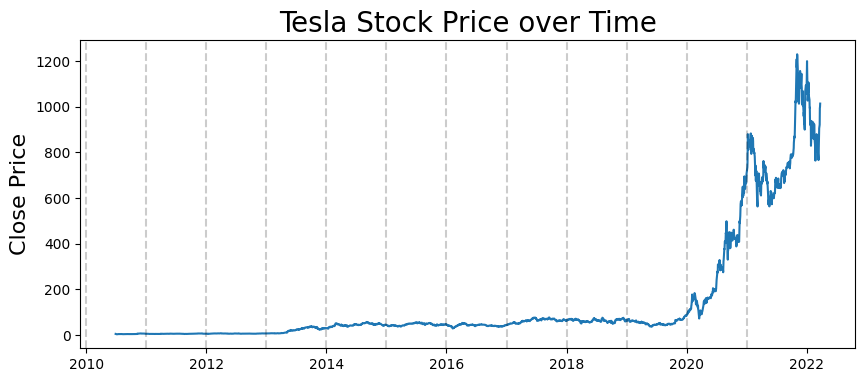

In [35]:
plt.figure(figsize=(10,4))
plt.plot(df['Close'])
plt.title('Tesla Stock Price over Time', fontsize=20)
plt.ylabel('Close Price', fontsize=16)
for year in range(2010,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

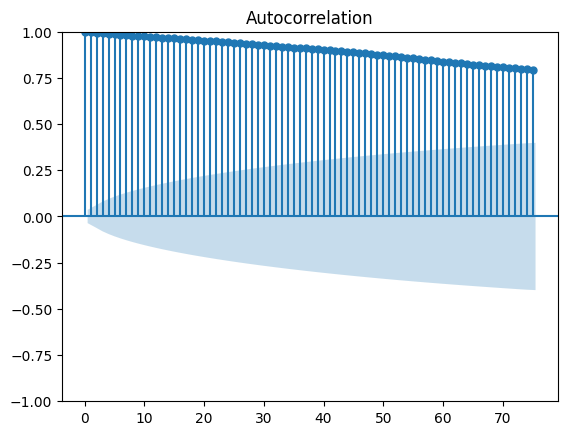

In [44]:
#ACF
acf_plot = plot_acf(df['Close'], lags=75)